# Metodo dei Minimi Quadrati applicato ai dati di Centa San Nicolò

Matteo Franzoi - Andrea Rebellato - 2019-03-27

---

Primo passo è importare le librerie

In [1]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
os.getcwd()

'D:\\jupyter\\esercitazione'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 'abs_mle',  
 'best_parameters',  
 'lsCenta.ipynb',  
 'lsppCenta.ipynb',  
 '**massimePrecipitazioniCenta.csv**',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb',  
 'pearsonCenta.ipynb']

e importare il ffile _csv_ dei dati

In [5]:
pd.set_option('display.max_rows', 20)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,1h,3h,6h,12h,24h
anno,,,,,
1934,22.6,42.0,56.6,58.8,85.0
1935,17.8,32.6,54.2,63.6,88.0
1936,15.8,28.0,41.4,72.0,85.2
1937,27.8,35.6,38.2,58.4,62.6
1938,15.0,21.4,32.0,56.0,83.0
1939,29.4,36.2,61.0,115.2,117.8
1940,28.8,67.0,94.0,119.0,135.2
1941,14.2,21.0,25.6,44.0,51.0
1942,27.0,42.0,66.2,82.6,85.6


Si definisce la seguente funzione, dove:  
* __t__ è la variabile indipendente;
* __x__ è il vettore dei parametri _a_ e *b*:
$$ x[0] = a, \quad x[1] = b$$

In [6]:
def fun(x, t, y):
    return np.exp(-np.exp(-(t - x[0])/x[1])) - y

Per applicare il metodo dei minimi quadrati è necessario importare l'omonima funzione da _scipy_

In [7]:
from scipy.optimize import least_squares

Per ogni valore di durata si deve definire un vettore $x_0$ di valori iniziali di _a_ e *b*.  
Per 1h

In [8]:
x0 = [20, 6]
ecdf1h = ECDF(data['1h'])
t_train = sorted(data['1h'].dropna())
y_train = ecdf1h(t_train)

dove __t_train__ ordina i dati relativi alla durata, eliminando i dati NaN e **y_train** da in pasto i dati _ordinati_ alla empirical cumulative distribution function relativa alla durata scelta.  
Si può quindi applicare la funzione dei minimi quadrati

In [9]:
res_lsq_1h = least_squares(fun, x0, args = (t_train, y_train))

che prende come input la funzione da minimizzare (definita poc'anzi), il vettore dei valori iniziali e gli argomenti che vanno dati in pasto alla funzione __fun__. In particolare, la funzione __fun__ ha come input
$$ fun(x, args,\dots) $$

I valori per la durata di 1h sono

In [10]:
res_lsq_1h.x

array([19.44805869,  6.83870984])

Il medesimo procedimento deve essere fatto per ogni durate.  
Per 3h

In [11]:
x0 = [30, 10]
ecdf3h = ECDF(data['3h'])
t_train = sorted(data['3h'].dropna())
y_train = ecdf3h(t_train)
res_lsq_3h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_3h.x

array([29.19866157,  9.41624222])

Per 6h

In [12]:
x0 = [40, 12]
ecdf6h = ECDF(data['6h'])
t_train = sorted(data['6h'].dropna())
y_train = ecdf6h(t_train)
res_lsq_6h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_6h.x

array([40.25106396, 13.17942413])

Per 12h

In [13]:
x0 = [57, 20]
ecdf12h = ECDF(data['12h'])
t_train = sorted(data['12h'].dropna())
y_train = ecdf12h(t_train)
res_lsq_12h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_12h.x

array([56.00373317, 17.79886564])

Per 24h

In [14]:
x0 = [76, 25]
ecdf24h = ECDF(data['24h'])
t_train = sorted(data['24h'].dropna())
y_train = ecdf24h(t_train)
res_lsq_24h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_24h.x

array([74.32422653, 23.54694652])

È utile costruire un DataFrame contentente tutti i valori

In [15]:
abs_ls = pd.DataFrame([
    res_lsq_1h.x,
    res_lsq_3h.x,
    res_lsq_6h.x,
    res_lsq_12h.x,
    res_lsq_24h.x
]).T
#------------------------indice-----------------------
abs_ls.index = ['a', 'b']
#------------------------colonne----------------------
abs_ls.columns = ['1h', '3h', '6h', '12h', '24h']
#-----------------------------------------------------
abs_ls

,1h,3h,6h,12h,24h
a,19.448059,29.198662,40.251064,56.003733,74.324227
b,6.838710,9.416242,13.179424,17.798866,23.546947


che va salvato in un file

In [16]:
abs_ls.to_pickle('abs_ls')

In [18]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 '**abs_ls**  
 'abs_m',  
 'abs_mle',  
 'lsCenta.ipynb',  
 'massimePrecipitazioniCenta.csv',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb']

Definita la funzione di Gumbel

In [19]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

e definito il vettore che va dal minimo dei dati al massimo dei dati

In [20]:
t_rain = np.linspace(data.min()['1h'], data.max()['24h'], 100)

dove

In [21]:
print ('minimo = ', data.min()['1h'])
print ('massimo =', data.max()['24h'])

minimo =  12.6
massimo = 192.0


Si definisce il DataFrame che contiene i valori che escono dalla funzione di Gumbel divisi per durata e per precipitazione

In [22]:
gb = pd.DataFrame([
    gumbel(t_rain, abs_ls, '1h'),
    gumbel(t_rain, abs_ls, '3h'),
    gumbel(t_rain, abs_ls, '6h'),
    gumbel(t_rain, abs_ls, '12h'),
    gumbel(t_rain, abs_ls, '24h')
]).T
#------------------------indice-----------------------
gb.index = t_rain
#------------------------colonne----------------------
gb.columns = ['1h', '3h', '6h', '12h', '24h']
#-----------------------------------------------------
gb

,1h,3h,6h,12h,24h
12.600000,0.065743,0.002942,0.000289,0.000011,0.000001
14.412121,0.123888,0.008163,0.000822,0.000032,0.000003
16.224242,0.201443,0.018940,0.002048,0.000087,0.000008
18.036364,0.292504,0.037927,0.004537,0.000216,0.000018
19.848485,0.389408,0.067254,0.009074,0.000489,0.000041
21.660606,0.485009,0.107880,0.016601,0.001022,0.000086
23.472727,0.573985,0.159307,0.028105,0.001990,0.000172
25.284848,0.653166,0.219732,0.044469,0.003634,0.000327
27.096970,0.721244,0.286485,0.066333,0.006259,0.000593
28.909091,0.778247,0.356568,0.093993,0.010228,0.001028


Si procede quindi al plot dei delle curve di distribuzione di probabilità pluviometrica

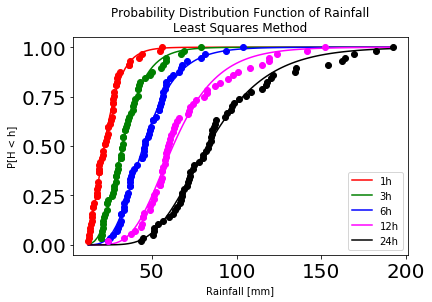

In [23]:
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

#----------------plot---------------

ax = gb.plot(color = ['red', 'green', 'blue', 'magenta', 'black'])

#--------------1h--------------------
data1h = data['1h'].dropna()
ecdf1h = ECDF(data1h)
ax.plot(data1h, ecdf1h(data1h), 'o', c = 'red')

#--------------3h--------------------
data3h = data['3h'].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h, ecdf3h(data3h), 'o', c = 'green')

#--------------6h--------------------
data6h = data['6h'].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h, ecdf6h(data6h), 'o', c = 'blue')

#--------------12h-------------------
data12h = data['12h'].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h, ecdf12h(data12h), 'o', c = 'magenta')

#--------------24h-------------------
data24h = data['24h'].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h, ecdf24h(data24h), 'o', c = 'black')

#------------------------------------
ax.set_title('Probability Distribution Function of Rainfall\nLeast Squares Method')
ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H < h]')

#------------------------------------
plt.show()

**dropna()** separa ed elimina i dati NaN.